# Linear Regression

### Bases on Ball or Stolen Bases (BB vs SB)?

In [3]:
install.packages("Lahman")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(Lahman)
library(dslabs)
library(tidyverse)

In [3]:
ds_theme_set()

### Explorig the data

In [4]:
sprintf("Nunber of records = %i" , nrow(Teams))
paste("Number of columns = ", ncol(Teams))

[1] "Nunber of records = 2835"

[1] "Number of columns =  48"

In [5]:
names(Teams)

[1] "yearID"         "lgID"           "teamID"         "franchID"      
 [5] "divID"          "Rank"           "G"              "Ghome"         
 [9] "W"              "L"              "DivWin"         "WCWin"         
[13] "LgWin"          "WSWin"          "R"              "AB"            
[17] "H"              "X2B"            "X3B"            "HR"            
[21] "BB"             "SO"             "SB"             "CS"            
[25] "HBP"            "SF"             "RA"             "ER"            
[29] "ERA"            "CG"             "SHO"            "SV"            
[33] "IPouts"         "HA"             "HRA"            "BBA"           
[37] "SOA"            "E"              "DP"             "FP"            
[41] "name"           "park"           "attendance"     "BPF"           
[45] "PPF"            "teamIDBR"       "teamIDlahman45" "teamIDretro"

In [6]:
summary(Teams)

     yearID     lgID          teamID        franchID       divID          
 Min.   :1871   AA:  85   CHN    : 141   ATL    : 141   Length:2835       
 1st Qu.:1920   AL:1220   PHI    : 134   CHC    : 141   Class :character  
 Median :1964   FL:  16   PIT    : 130   CIN    : 135   Mode  :character  
 Mean   :1956   NA:  50   CIN    : 127   PIT    : 135                     
 3rd Qu.:1993   NL:1444   SLN    : 125   STL    : 135                     
 Max.   :2016   PL:   8   BOS    : 116   PHI    : 134                     
                UA:  12   (Other):2062   (Other):2014                     
      Rank              G             Ghome            W         
 Min.   : 1.000   Min.   :  6.0   Min.   :44.0   Min.   :  0.00  
 1st Qu.: 2.000   1st Qu.:154.0   1st Qu.:77.0   1st Qu.: 66.00  
 Median : 4.000   Median :157.0   Median :81.0   Median : 77.00  
 Mean   : 4.095   Mean   :150.5   Mean   :78.5   Mean   : 74.81  
 3rd Qu.: 6.000   3rd Qu.:162.0   3rd Qu.:81.0   3rd Qu.: 87.00  
 Max

In [7]:
head(Teams, n = 5)

yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,⋯,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1871,NA,BS1,BNA,NA,3,31,NA,20,10,⋯,NA,0.838,Boston Red Stockings,South End Grounds I,NA,103,98,BOS,BS1,BS1
1871,NA,CH1,CNA,NA,2,28,NA,19,9,⋯,NA,0.829,Chicago White Stockings,Union Base-Ball Grounds,NA,104,102,CHI,CH1,CH1
1871,NA,CL1,CFC,NA,8,29,NA,10,19,⋯,NA,0.814,Cleveland Forest Citys,National Association Grounds,NA,96,100,CLE,CL1,CL1
1871,NA,FW1,KEK,NA,7,19,NA,7,12,⋯,NA,0.803,Fort Wayne Kekiongas,Hamilton Field,NA,101,107,KEK,FW1,FW1
1871,NA,NY2,NNA,NA,5,33,NA,16,17,⋯,NA,0.839,New York Mutuals,Union Grounds (Brooklyn),NA,90,88,NYU,NY2,NY2


### Plotting Runs per Game vs. Home Runs per game

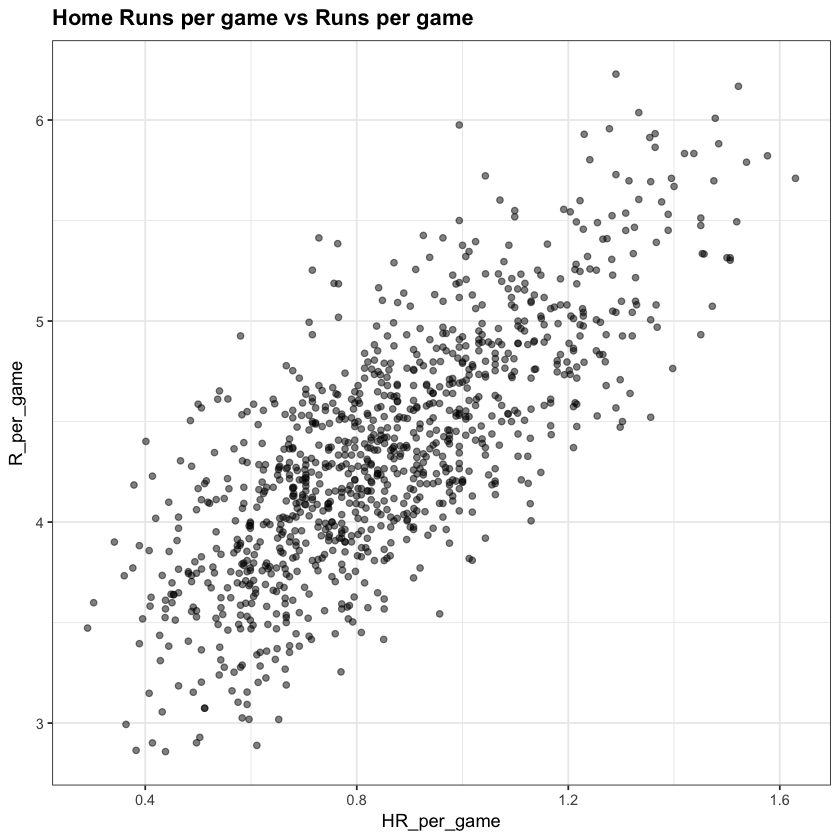

In [8]:
Teams %>% filter(yearID %in% 1961:2001) %>%
    mutate(HR_per_game = HR/G, R_per_game = R/G) %>%
    ggplot(aes(HR_per_game, R_per_game)) +
    geom_point(alpha = 0.5) +
    ggtitle("Home Runs per game vs Runs per game")

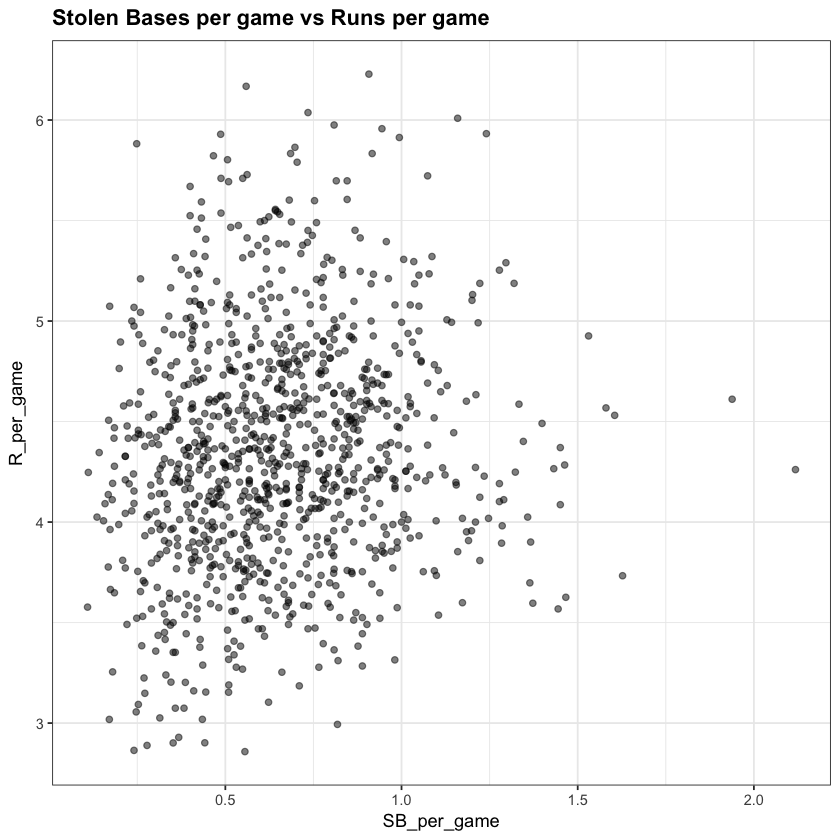

In [9]:
Teams %>% filter(yearID %in% 1961:2001) %>%
    mutate(SB_per_game = SB/G, R_per_game = R/G) %>%
    ggplot(aes(SB_per_game, R_per_game)) +
    geom_point(alpha = 0.5) +
    ggtitle("Stolen Bases per game vs Runs per game")

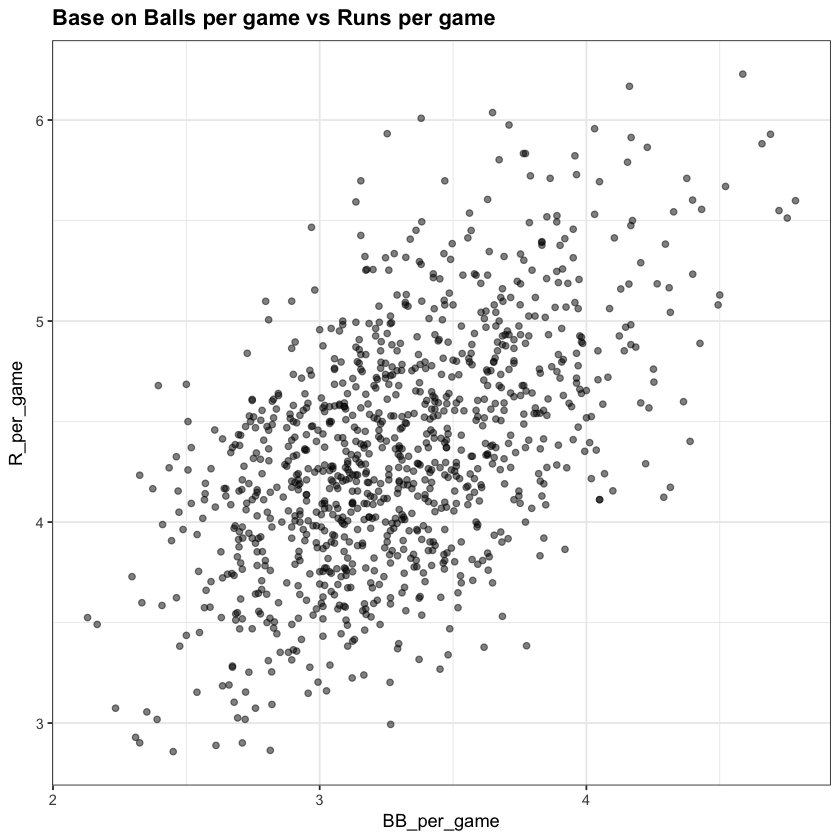

In [10]:
Teams %>% filter(yearID %in% 1961:2001) %>%
    mutate(BB_per_game = BB/G, R_per_game = R/G) %>%
    ggplot(aes(BB_per_game, R_per_game)) +
    geom_point(alpha = 0.5) +
    ggtitle("Base on Balls per game vs Runs per game")

## Concept: Confounding 
TBD

You want to know whether teams with more at-bats per game have more runs per game. What R code below correctly makes a scatter plot for this relationship?

A: Make a scatter plot of runs per game (y-axis) vs. at-bats per game (x-axis).

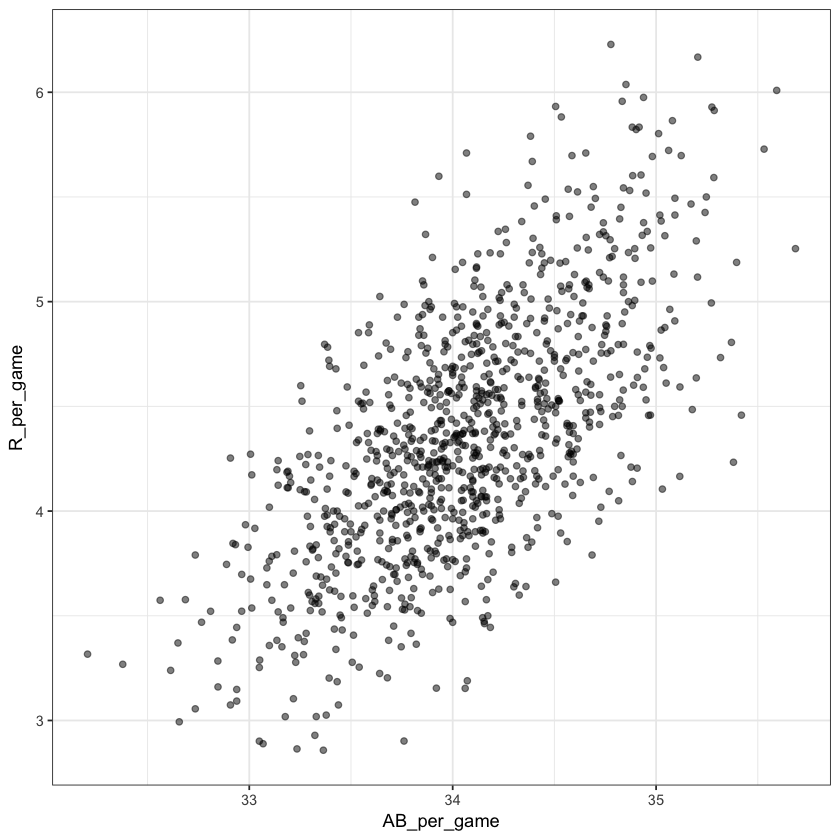

In [11]:
Teams %>% filter(yearID %in% 1961:2001 ) %>%
    mutate(AB_per_game = AB/G, R_per_game = R/G) %>%
    ggplot(aes(AB_per_game, R_per_game)) + 
    geom_point(alpha = 0.5)

## Correlation

In [4]:
library(HistData)
data("GaltonFamilies")

In [5]:
head(GaltonFamilies)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5
002,75.5,66.5,73.66,4,2,male,72.5


In [6]:
galton_heights <- GaltonFamilies %>%
    filter(childNum == 1 & gender == "male") %>%
    select(father, childHeight) %>%
    rename(son = childHeight)

Create a dataset with the heights of fathers and the first sons. We also know that both distributions are well approximated by normal distributions, we can use the two averages and two standard deviations as summaries.

In [7]:
head(galton_heights)

father,son
78.5,73.2
75.5,73.5
75.0,71.0
75.0,70.5
75.0,72.0
74.0,76.5


In [8]:
galton_heights %>%
    summarize(mean(father), sd(father), mean(son), sd(son))

mean(father),sd(father),mean(son),sd(son)
69.09888,2.546555,70.45475,2.557061


However, this summary fails to describe a very important characteristic of the data that you can see in this figure. __The trend that the taller the father, the taller the son__, is not described by the summary statistics of the average and the standard deviation. We will learn that the __correlation coefficient__ is a summary of this trend.

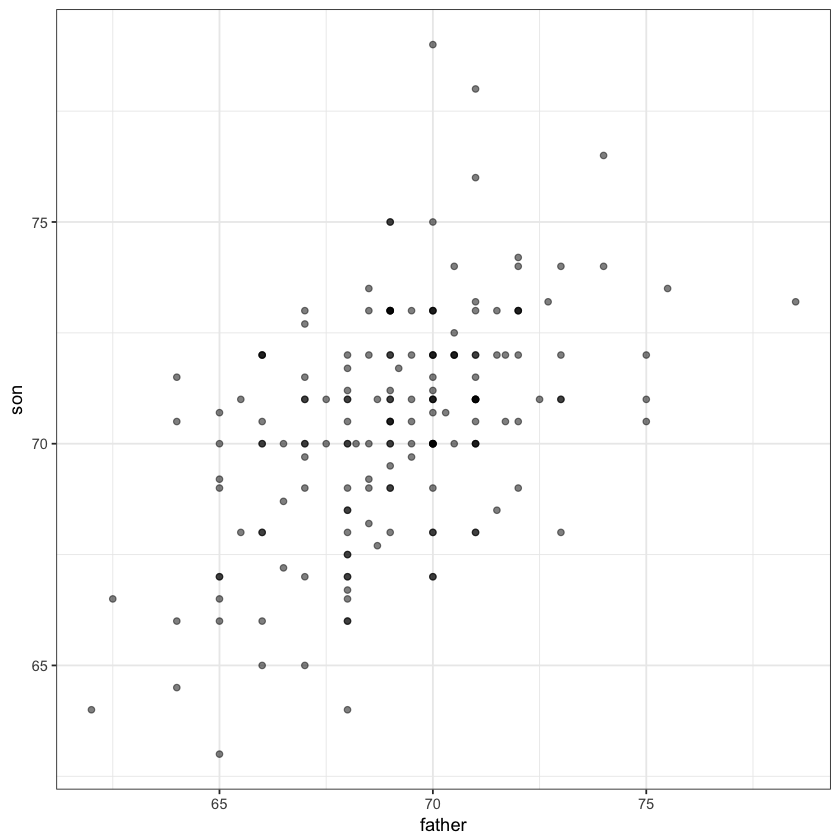

In [17]:
galton_heights %>% 
    ggplot(aes(father, son)) +
    geom_point(alpha = 0.5)

### Correlation Coefficient

defined for a list of pairs $(x_1, y_1), ..., (x_n, y_n)$ with the following formula:

## $\rho = \frac{1}{n} \sum\limits_{i=1}^{n}\big(\frac{x_i-\mu_x}{\sigma_x}\big)\big(\frac{y_i-\mu_y}{\sigma_y}\big)$  

Here we can say: 

the i-th entry of $x$ is $\big(\frac{x_i-\mu_x}{\sigma_x}\big)$ SDs away from the average 

Similarly, $y_i$ is $\big(\frac{y_i-\mu_y}{\sigma_y}\big)$ SDs away from the average $y$  

If $x$ and $y$ are unrelated, then the product of $\big(\frac{x_i-\mu_x}{\sigma_x}\big)\big(\frac{y_i-\mu_y}{\sigma_y}\big)$ will be positive as often as negative and will average to about `0`

* $\mu_x$ and $\mu_y$ are the averages
* $\sigma_x$ and $\sigma_y$ are the standard deviations
* $\rho$ denote correlatoin (rho)
* Correlation is always between `-1 and 1`. Unrelated variables will have a correlation of `0`
* If the quantities vary __together__, we are avaraging mostly __positive__ products and we get a __positive__ correlation.
* If the quantities vary in __opposite__ directions, we get a __negative__ correlation.

In [18]:
galton_heights %>% summarize("Correlation" = cor(father, son))

Correlation
0.5007248


Examples when correlation is between 0 and 0.99

<img src="7.png">

### Sample Correlation is a Random Variable
The __sample correlation__ is the most commonly used estimate of the __population correlation__.

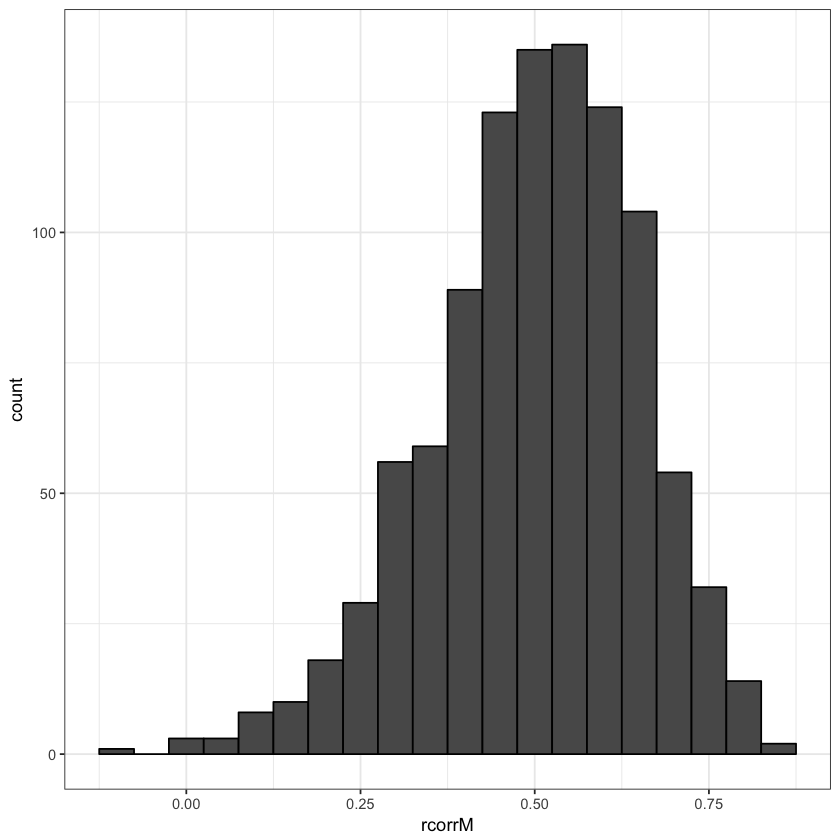

In [33]:
# Radnome variable of a sample of 25
set.seed(0)

rcorr <- sample_n(galton_heights, 25, replace = TRUE) %>%
    summarize(cor(father, son)) 

# Run a Monte Carlo simulation to see the distribution of this Random Variable
B <- 1000
N <- 25

rcorrM <- replicate(B, {
    sample_n(galton_heights, N, replace = TRUE) %>%
        summarize(r=cor(father, son)) %>%
        .$r
})

data.frame(rcorrM) %>%
    ggplot(aes(rcorrM)) +
    geom_histogram(binwidth = 0.05, color = "black")

We see that the expected value is the population correlation,
the mean of these Rs is 0.5, and that it has a relatively high standard error relative to its size, SD 0.147.

This is something to keep in mind when interpreting correlations.
It is a random variable, and it can have a pretty large standard error.

In [26]:
mean(rcorrM)
sd(rcorrM)

[1] 0.5005559

[1] 0.1472816

Also note that because the sample correlation is
an average of independent draws, the Central Limit Theorem actually applies. Therefore, for a large enough sample size N, the distribution of these Rs is approximately normal. The expected value we know is the population correlation.

The standard deviation is somewhat more complex to derive, but this is the actual formula here. In our example, N equals to 25, does not appear to be large enough to make the approximation a good one, as we see in this.

Try with N = 50


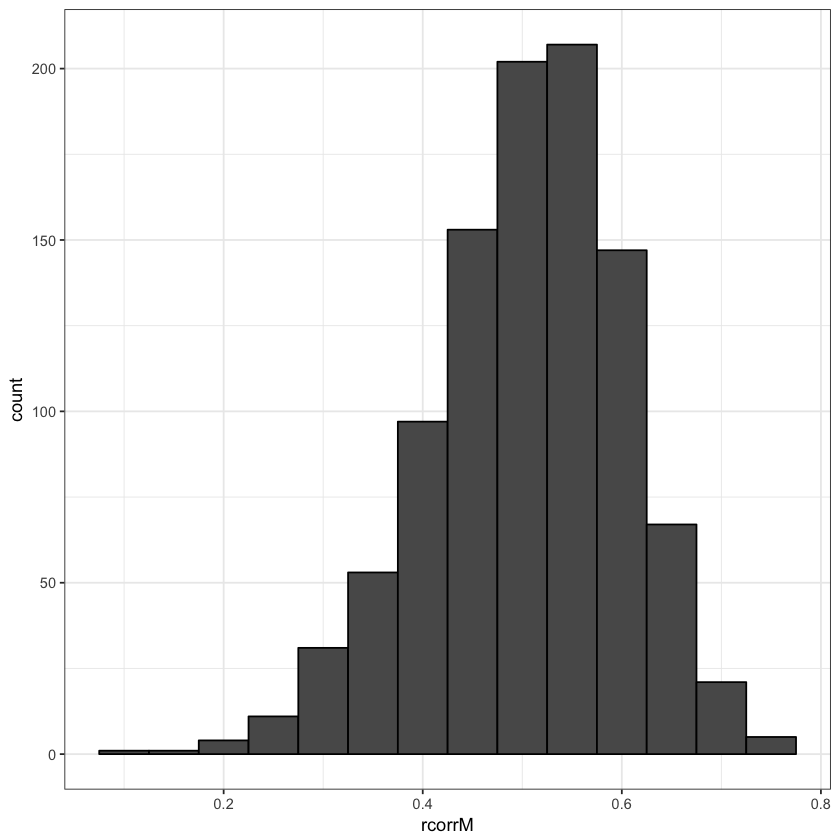

In [34]:
set.seed(0)
N <- 50

rcorrM <- replicate(B, {
    sample_n(galton_heights, N, replace = TRUE) %>%
        summarize(r=cor(father, son)) %>%
        .$r
})

data.frame(rcorrM) %>%
    ggplot(aes(rcorrM)) +
    geom_histogram(binwidth = 0.05, color = "black")

In [35]:
mean(rcorrM)
sd(rcorrM)

[1] 0.504145

[1] 0.09874101

### Question 1

Instead of running a Monte Carlo simulation with a sample size of 25 from our 179 father-son pairs, we now run our simulation with a sample size of 50.

Would you expect the __mean__ of our sample correlation to increase, decrease, or stay approximately the same?

__A: Stay approximately the same__

### Question 2

Instead of running a Monte Carlo simulation with a sample size of 25 from our 179 father-son pairs, we now run our simulation with a sample size of 50.

Would you expect the __standard deviation__ of our sample correlation to increase, decrease, or stay approximately the same?

__A: Decrease__

## Anscombe's Quartet/Stratification  

The following artificial data sets referred to as __Anscombe's Quartet__. All of these pairs have a correlation of `0.82`. This helps to illustrate that correlation is only meaningful in a particular context.

<img src="8.png">

In [9]:
galton_heights %>%
    summarize(round(mean(father), 1), round(sd(father),1), round(mean(son),1), round(sd(son),1))

"round(mean(father), 1)","round(sd(father), 1)","round(mean(son), 1)","round(sd(son), 1)"
69.1,2.5,70.5,2.6


Illustrate how we can use father's height to predict son's heights. This will help motivate and define linear regression. Correlation can be useful for prediction.

Suppose we are asked to guess the height of a randomly selected son.
Because of the distribution of the son height is approximately normal, we know that the average height of `70.5 inches` is a value with the highest proportion and would be the prediction with the chances of minimizing the error.

But what if we are told that the father is `72 inches`? Do we still guess `70.5 inches` for the son? The father is taller than average, specifically he is `1.14` __standard deviations__ taller than the average father. So shall we predict that the son is also `1.14` standard deviations taller than the average son?

It turns out that this would be an __overestimate.__

To see this, we look at all the sons with fathers who are about `72 inches`. We do this by __stratifying__ the father's side. We call this a __conditional average__, since we are
> computing the average son height conditioned on the father being `72 inches` tall.

A challenge when using this approach in practice is that we don't have many fathers that are exactly `72`. In our data set, we only have eight.
If we change the number to `72.5`, we would only have one father who is that height.

This would result in __averages with large standard errors__, and they won't be useful for prediction for this reason.

But for now, what we'll do is we'll take an approach of creating __strata__ of fathers with very similar heights. Specifically, we will round fathers' heights to the nearest inch. This gives us the following prediction for the son of a father that is approximately 72 inches tall.

We can use this code and get our answer, which is `71.84`. This is `0.54` standard deviations larger than the average son, a smaller
number than the `1.14` standard deviations taller that the father was
above the average father.



In [13]:
conditional_avg <- galton_heights %>% 
    filter(round(father) == 72) %>% 
    summarize(avg = mean(son)) %>%
    .$avg

round(conditional_avg, 1)

[1] 71.8

__Stratification__ followed by __box plots__ lets us see the distribution of each group. Here is that plot. We can see that the centers of these groups are increasing with height, not surprisingly. The means of each group appear to follow a linear relationship.




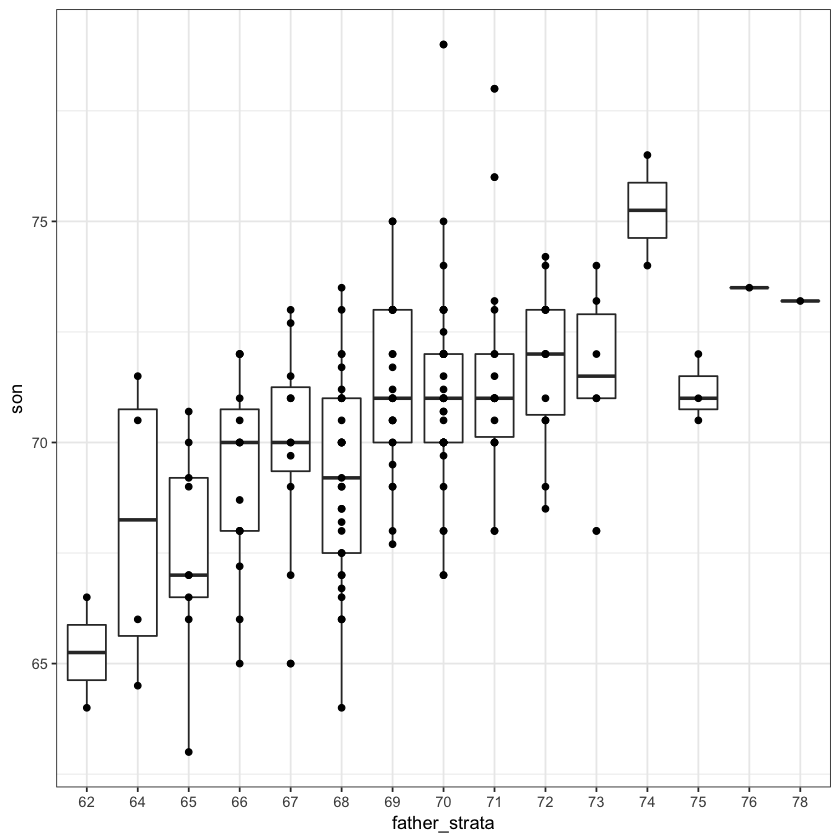

In [11]:
galton_heights %>%
    mutate(father_strata = factor(round(father))) %>%
    ggplot(aes(father_strata, son)) + 
    geom_boxplot() + 
    geom_point()

We can make that plot like this, with this code. See the plot and notice that this appears to follow a line. The `slope` of this line appears to be about `0.5`, which happens to be the __correlation__ between father and son heights.

This is not a coincidence.




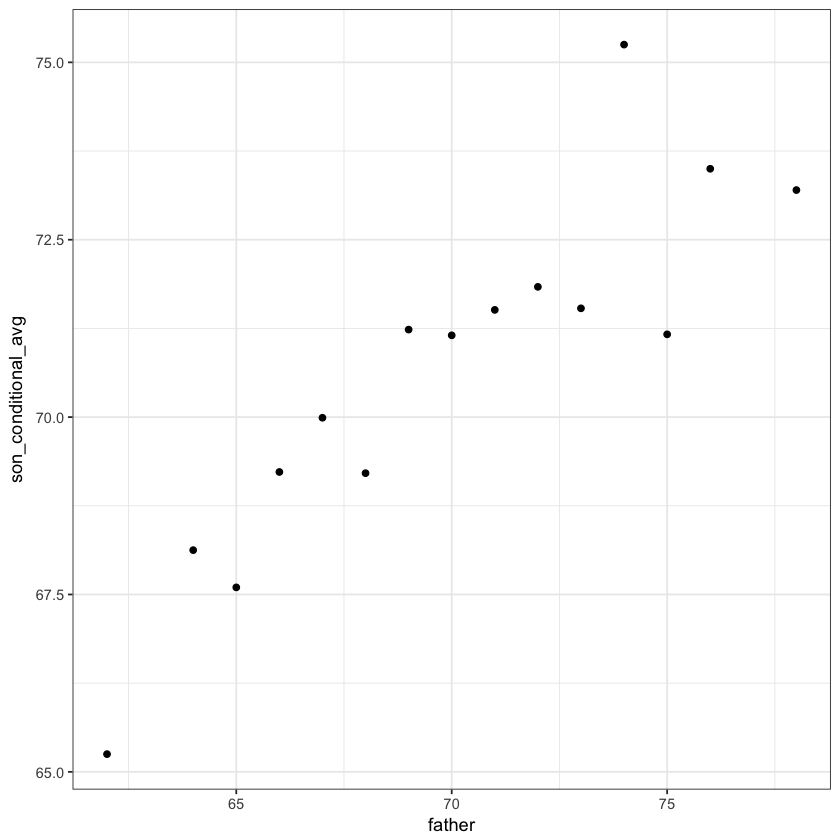

In [12]:
galton_heights %>%
    mutate(father = round(father)) %>%
    group_by(father) %>%
    summarize(son_conditional_avg = mean(son)) %>%
    ggplot(aes(father, son_conditional_avg)) + 
    geom_point()

<img src="9.png">

To see this connection, let's plot the __standardized heights__ against each other, son versus father, with a line that has a slope equal to the correlation.

Here's the code.
Here's a plot.



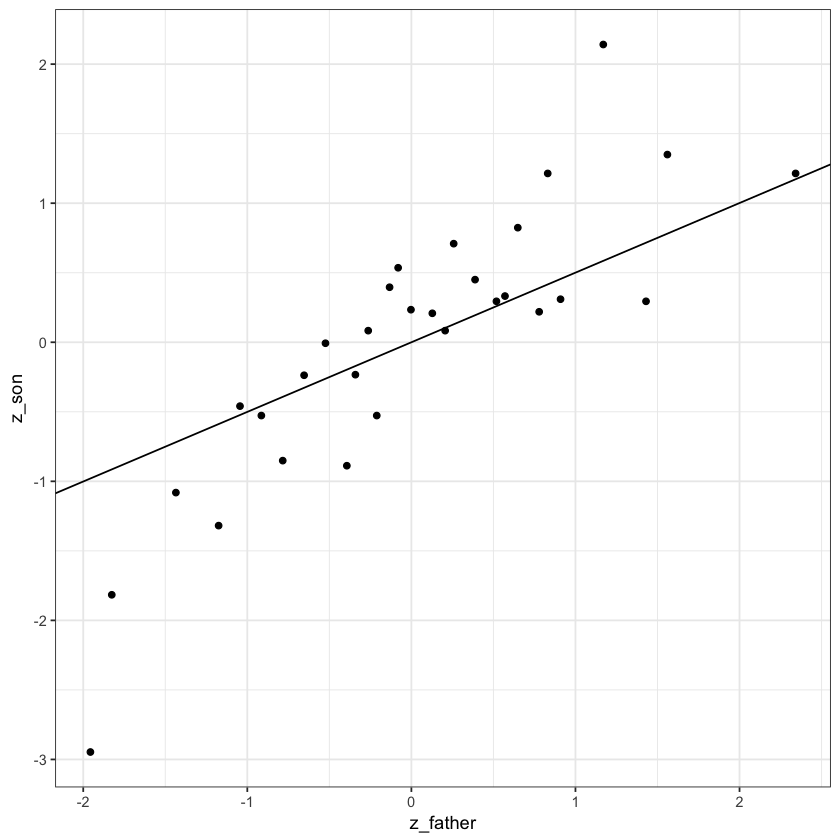

In [21]:
r <- galton_heights %>%
    summarize(r = cor(father, son)) %>% .$r
galton_heights %>%
    mutate(fahter = round(father)) %>%
    group_by(father) %>%
    summarize(son = mean(son)) %>%
    mutate(z_father = scale(father), z_son = scale(son)) %>%
    ggplot(aes(z_father, z_son)) + 
    geom_point() +
    geom_abline(intercept = 0, slope = r)
    

This line is what we call the __regression line__. In a later video, we will describe `Galton's` theoretical justification for using this line to __estimate conditional means__.

Here, we define it and compute it for the data at hand. The regression line for two variables, `x` and `y`, tells us that for every standard deviation $\sigma_x$ increase above the average $\mu_x$,  `y` grows $\rho$ standard deviations $\sigma_y$ above the average $\mu_y$.

The formula for the __regression line__ is therefore this one.

## $\big(\frac{y_i-\mu_y}{\sigma_y}\big) = \rho\big(\frac{x_i-\mu_y}{\sigma_x}\big)$

If there's perfect correlation, we predict an increase that is the same number of SDs. If there's zero correlation, then we don't
use x at all for the prediction of y.

For values between 0 and 1, the prediction is somewhere in between.
If the correlation is negative, we predict a reduction, instead of
an increase.

It is because when the correlation is positive but lower than the one,
that we predict something closer to the mean, that we call this regression.

The son regresses to the average height. In fact, the title of Galton's paper was "Regression Towards Mediocrity in Hereditary Stature." Note that if we write this in the standard form of a line,
$y = b + mx$, where `b` is the intercept and `m` is the slope,
the regression line has slope:

## slope $m$ = $\rho\frac{\sigma_y}{\sigma_x}$ and intercept $b = \mu_y - m\mu_x$

So if we standardize the variable so they have average `0` and standard deviation `1`. Then the regression line has intercept `0` and slope equal to the correlation $\rho$.

Let's look at the original data, father son data, and add the regression line. We can compute the intercept and the slope using the formulas we just derived. Here's a code to make the plot with the regression line.


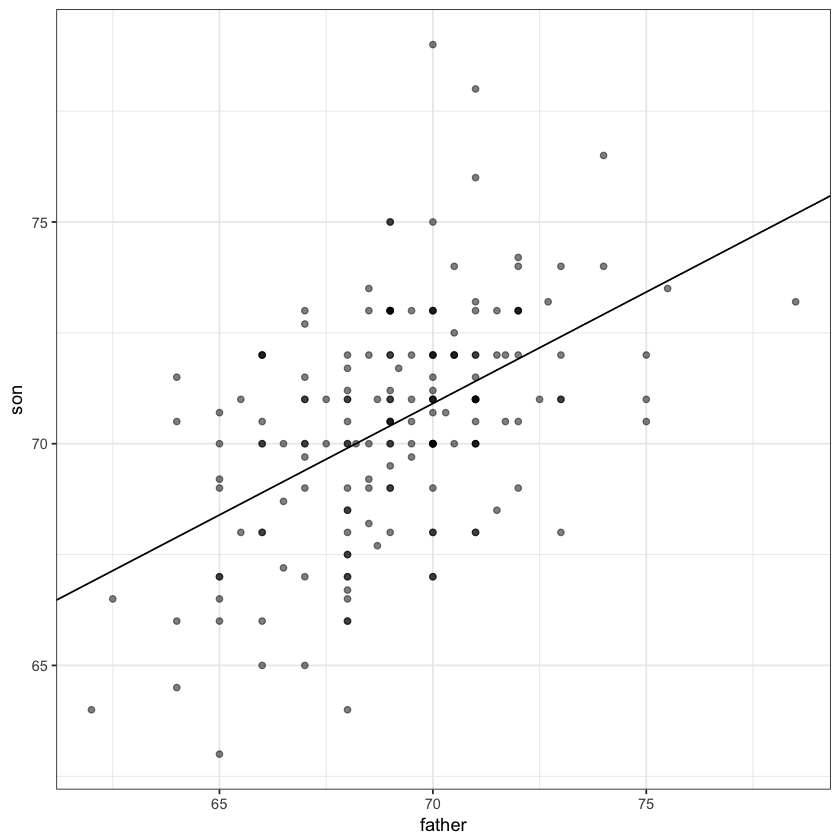

In [17]:
mu_x <- mean(galton_heights$father)
mu_y <- mean(galton_heights$son)

s_x <- sd(galton_heights$father)
s_y <- sd(galton_heights$son)

r <- cor(galton_heights$father, galton_heights$son)
m <- r * s_y/s_x
b <- mu_y - m * mu_x

galton_heights %>%
    ggplot(aes(father, son)) +
    geom_point(alpha = 0.5) + 
    geom_abline(intercept = b, slope = m)

If we plot the data in standard units, then, as we discussed, the regression line as intercept `0` and slope $\rho$.

Here's the code to make that plot.



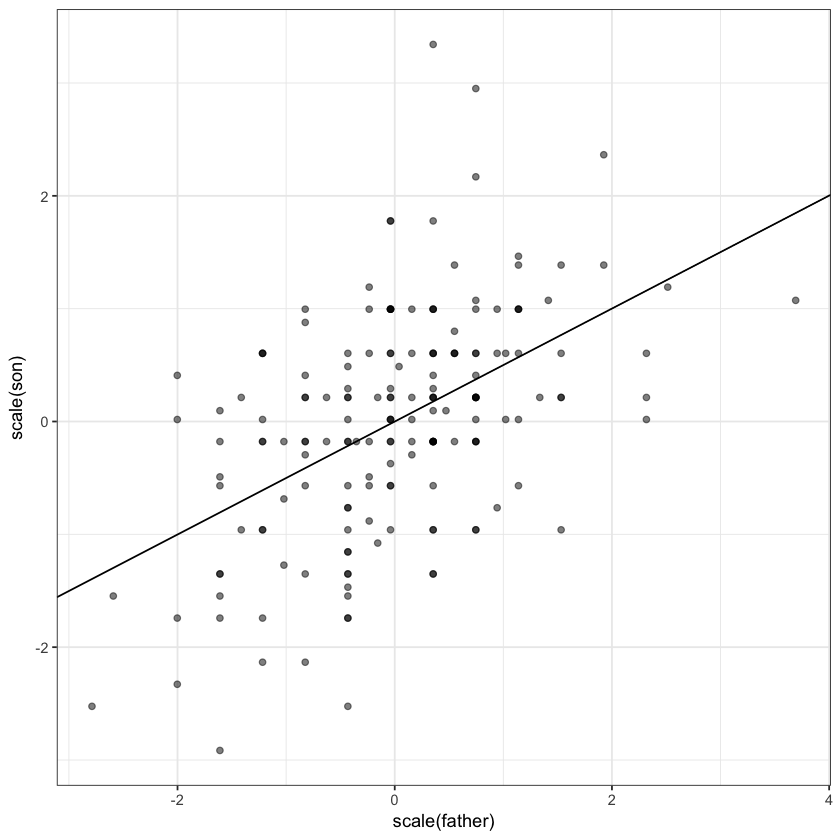

In [19]:
galton_heights %>%
    ggplot(aes(scale(father), scale(son))) +
    geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0, slope = r)

We started this discussion by saying that we wanted to use the __conditional means to predict the heights of the sons__.
But then we realized that there were very few data points in each strata. When we did this approximation of rounding off the height of the fathers, we found that these conditional means appear to follow a line. And we ended up with the regression line.

So the __regression line gives us the prediction__. An advantage of using the regression line is that we used all the data to estimate just two parameters, the `slope` and the `intercept`.

This makes it much more stable.

When we do conditional means, we had fewer data points, which made the estimates have a large standard error, and therefore be unstable.
So this is going to give us a much more stable prediction using the regression line.

However, are we justified in using the regression line to predict Galton gives us the answer.


## Bivariate Nornal Distribution

Correlation and the regression line are widely used summary statistics. <u>But it is often misused or misinterpreted</u>.
As example provided toy example of data sets in which summarizing with a correlation would be a mistake. But we also see it in the media and in scientific literature as well.

The main way we motivate the use of correlation involve what is called the __bivariate normal distribution__. When a pair of random variables is approximated by a bivariate normal distribution, the scatterplot
looks like ovals, like American footballs. They can be thin. That's when they have high correlation.

All the way up to a circle shape when they have no correlation.
We saw some examples previously. Here they are again.

<img src="7.png">

A more technical way to define the bivariate normal distribution
is the following.

First, this distribution is __defined for pairs__.So we have two variables, `x` and `y`. And they have paired values.

They are going to be bivariate normally distributed if the following happens.
* If `X` is a normally distributed random variable,
* and `Y` is also a normally distributed random variable
* and for any grouping of `X` that we can define, say, with `x` being equal to some predetermined value, which we call here in this formula little x-- then the `Y`'s in that group are approximately normal as well.

If this happens, then the pair is __approximately bivariate normal__.
When we fix `X` in this way, we then refer to the resulting distribution of the `Y`'s in the group-- defined by setting `X` in this way-- as the __conditional distribution of `Y` given `X=x`__.

We write the notation like this for the conditional distribution
and the conditional expectation.

### $fY|X=x$ is conditional distribution and $E(Y|X=x)$ is the conditional expected value

If we think the height data is well-approximated by the bivariate normal distribution, then we should see the normal approximation hold for each grouping. Here, we `stratify` the son height by the `standardized father heights` and see that the assumption appears to hold. Here's the code that gives us the desired plot.


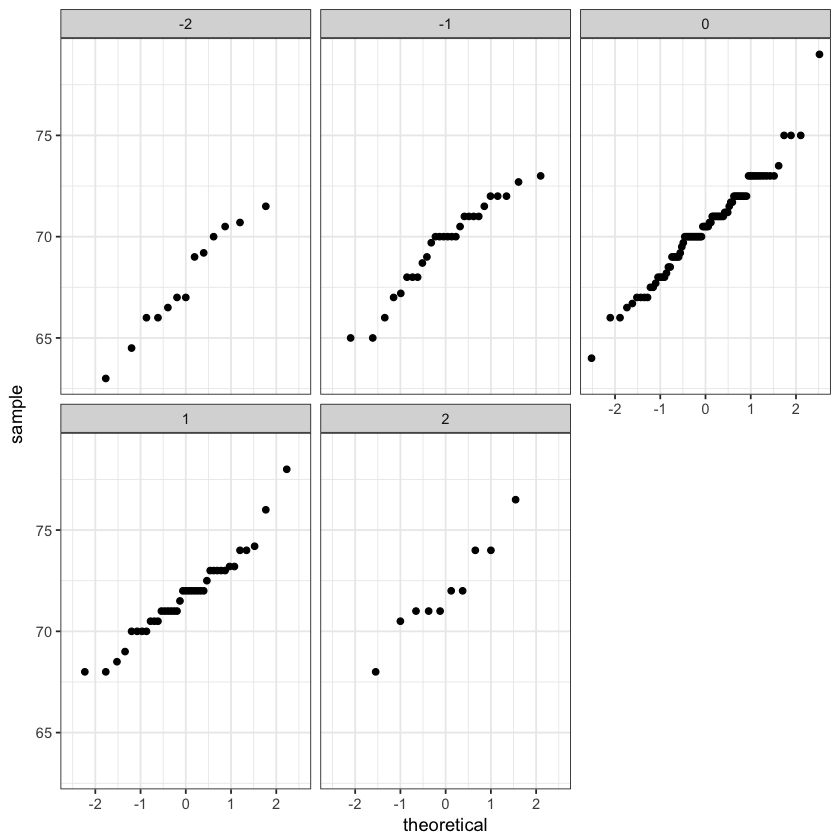

In [28]:
galton_heights %>%
    mutate(z_father = round((father - mean(father))/sd(father))) %>%
    filter(z_father %in% -2:2) %>%
    ggplot() +
    stat_qq(aes(sample=son)) +
    facet_wrap(~z_father)

Now, we come back to defining correlation. Galton showed-- using mathematical statistics-- that when two variables follow a bivariate normal distribution, then:

> for any given `x` the expected value of the `y` in pairs for which `x` is set at that value is: 

## $E(Y|X = x) = \mu_y + \rho \frac{X-\mu_x}{\sigma_x}\sigma_y$

Note that this is a `line` with `slope` $\rho \frac{\sigma_y}{\sigma_x}$ and `intercept` $\mu_y - m\mu_x$$ And therefore, this is the <u>same as the regression line we saw in a previous video</u>
That can be written like this.

## $\frac{E(Y||X = x) - \mu_y}{\sigma_y} = \rho \frac{x - \mu_x}{\sigma_x}$

So in summary, 
> if our data is approximately bivariate, then the conditional expectation-- which is the best prediction for `y` given that we know the value of `x`-- is given by the regression line.

## Variance Explained

The theory we've been describing also tells us that the standard deviation of the conditional distribution that we described in a previous video is:

## $Var(Y | X = x) = \sigma_y\sqrt{1-p^2}$

This is where statements like `x` explains such and such percent of the variation in `y` comes from.

Note that the __variance of y__ is $\sigma^2$.

That's where we start. If we condition on `X`, then the variance goes down to $(1-\rho^2)\sigma^2_y$.  

So from there, we can compute <u>how much the variance has gone down</u>. It has gone down by:  
    __$\rho^2 \times$ 100%__.


<u>So the correlation and the amount of variance explained are related to each other</u>.
> But it is important to remember that the variance explained statement only makes sense when the data is approximated by a bivariate normal distribution.


### There are Two Regression Lines

We computed a regression line to predict the son's height from the father's height. We used these calculations-- here's the code--
to get the slope and the intercept.



In [33]:
mu_x <- mean(galton_heights$father)
mu_y <- mean(galton_heights$son)

s_x <- sd(galton_heights$father)
s_y <- sd(galton_heights$son)

r <- cor(galton_heights$father, galton_heights$son)
m <- r * s_y/s_x
b <- mu_y - m * mu_x

print(b)
print(m)

[1] 35.71249
[1] 0.5027904


This gives us the function that the conditional expectation of `Y` given `X` is `35.7` plus `0.5` times `x`.  

## $E(Y | X =x) = 35.7 + 0.5x$  


So, what if we wanted to predict the father's height based on the son's? It is __important to know that this is not determined by computing the inverse function__ of what we just saw.

We need to compute the expected value of X given Y.  

## $E(X | Y= y)$
This gives us another regression function altogether,
with slope and intercept computed like this.


In [34]:
m <- r * s_x / s_y
b <- mu_x - m* mu_y
print(m)
print(b)

[1] 0.4986676
[1] 33.96539


So now we get that the expected value of `X` given `Y`, or the expected value of the father's height given the son's height,
is equal to `34` plus `0.5` y, a different regression line.

## $E(X | Y = y) = 34 + 0.5y$

> So in summary, it's important to remember that the regression line comes from computing expectations, and these give you two different lines, depending on if you compute the expectation of `Y` given `X` or `X` given `Y`.

# Linear Models

## Confounding: Are BBs More Predictive?